# AutoCorrelation (ACF) and Partial AutoCorrelation (PACF) Functions

* Correlation is a measure of the strenght of the linear relationship between two vairiables
* Correlation goes from -1(stronger negative relationship - one goes up, the other goes down) to +1(stronger positive relationship - one goes up, the other goes up)


# Autocorrelation (Correlogram) Plots
**The ACF describes the autocorrelation between and observation and another observation at a prior time step that includes direct and indirect dependence informaiton**

Takes the same set of data compares it against itself, lagged or shifted by a certain number of time units - e.g. calculating how correlated are today's sales to yesterday's sales:
* Sales day (i) plotted on the y-axis
* Sales day i-1 to i-n on the x-axis <br>


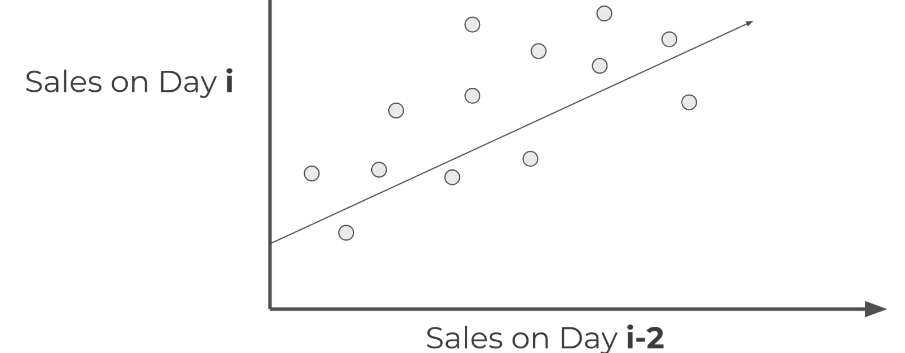

* shows the correlation of the serieswith itself, lagged by x time units
* y axis is the correlation
* x axis is the number of time units of lag

## ACF Example

In [12]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})

In [13]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [14]:
# autocorrelation array
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

# Partial AutoCorrelation plots
**Only describes the direct relationship between an observation and its lag**

* plots out the residuals (the error that is not explained by the linear model) of the linear fit between day i and day i-1 <br>
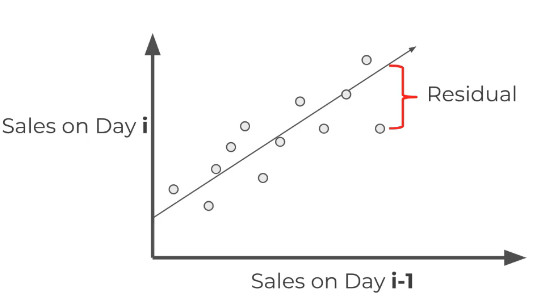<br>
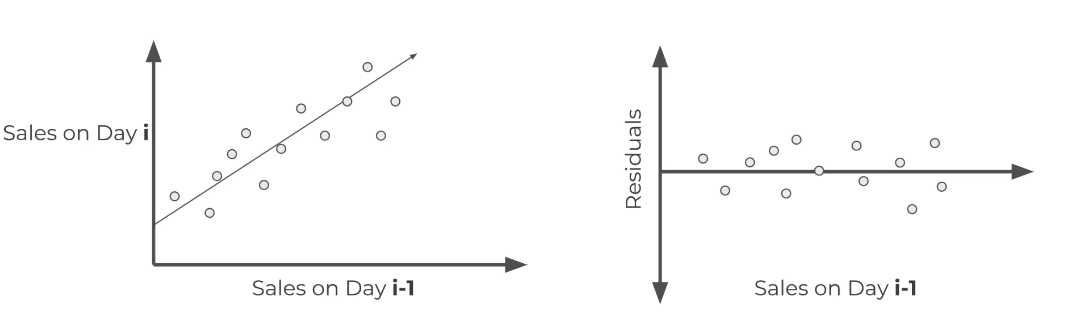<br>
* Then get the residuals fitted on day i-1, and plot those of day i-2; and repeat the process over and over <br>
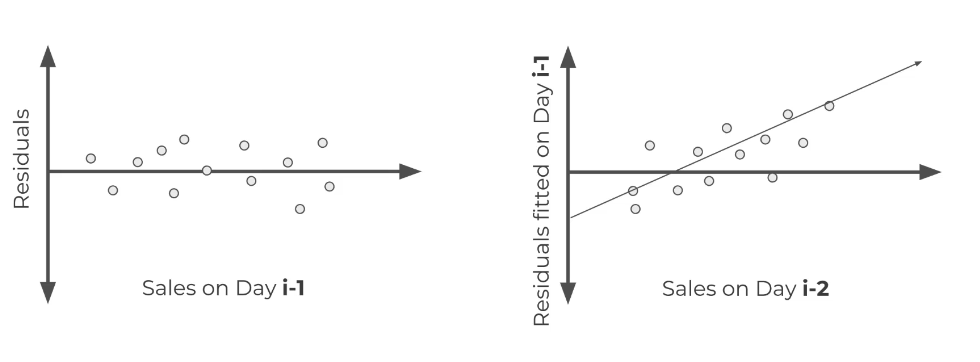<br>




## PACF example

In [15]:
df

,a
0,13
1,5
2,11
3,12
4,9


### youden-Walker method for partial acf

In [ ]:
# number of lags = 4
# mle for bias acf coefficients - maximum likelihood estimation. unbiased is the statsmodels default
pacf_yw(df['a'], nlags=4, method='mle') # othrer method options: method='unbiased


array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

### ols method for partial acf

ValueError: nlags must be smaller than nobs // 2 <br>
This ValueError: nlags must be smaller than nobs // 2 indicates an issue with the relationship between the number of lags (nlags) used in a statistical model and the number of observations (nobs) in the data. <br>

Specifically, the error message means that the number of lags you are attempting to use is too large relative to the available data points. The nobs // 2 part refers to integer division, meaning half the number of observations. The constraint nlags < nobs // 2 is often imposed in time series analysis functions (like those for calculating autocorrelation, partial autocorrelation, or fitting ARMA/ARIMA models) to ensure statistical validity and prevent issues with insufficient data for estimating the lag parameters.

In [23]:
pacf_ols(df['a'], nlags=2)

array([ 1.        , -0.49677419, -0.43181818])

# Plotting ACF and PACF

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import statsmodels api
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [24]:
# plotting time series with the lag version of itself
from pandas.plotting import lag_plot

# df1 - Non Stationary Dataset

In [7]:
# load the airline passenger data set
df1 = pd.read_csv('/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/airline_passengers.csv', index_col='Month', parse_dates=True)

# attach a frequency to the datetime index
df1.index.freq = 'MS'

In [11]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# df2 - Stationary Dataset

In [8]:
df2 = pd.read_csv('/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
# attach a frequency to the datetime index
df2.index.freq = 'D'

In [10]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


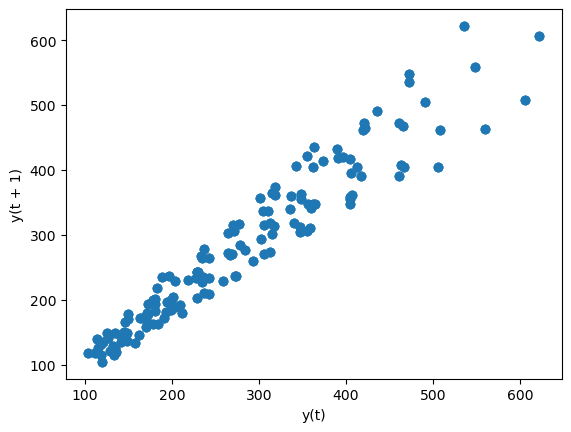

In [ ]:
# plot non-seasonal data
lag_plot(df1['Thousands of Passengers'])
plt.show()

Makes sense that because of the seasonality and the increase in passengers, there is a correlation between the number of passengers between one month and the previous month

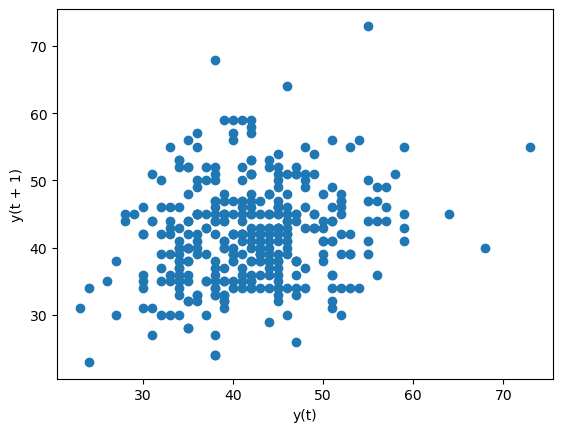

In [28]:
# plot stational data
lag_plot(df2['Births'])
plt.show()

Makes sense that there is little to no correlation between the number of births from one day to the previous day

## Plotting ACF

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

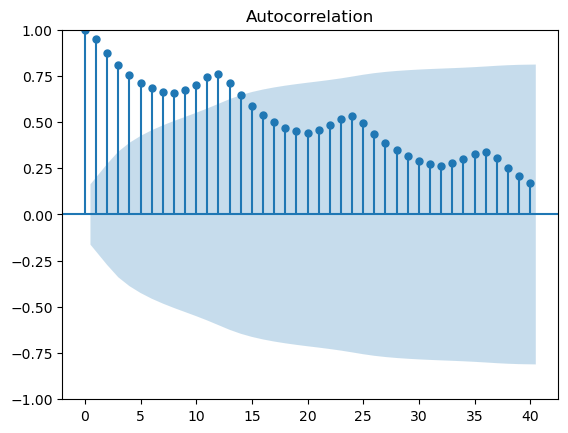

In [ ]:
# plot ACF for non-seasonal data
plot_acf(df1['Thousands of Passengers'], lags=40)
plt.show()

shaded region is the 95% confidence interval - correlations outside the shaded area are very likely to be correlated

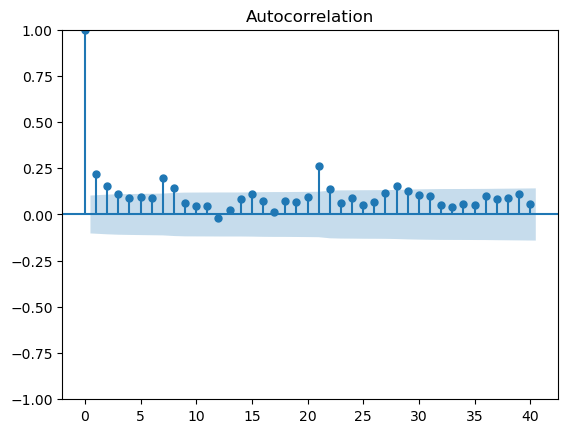

In [31]:
# plot acf for seasonal data
plot_acf(df2['Births'], lags=40)
plt.show()

## Plotting PACF
* works best with data that is already stationary

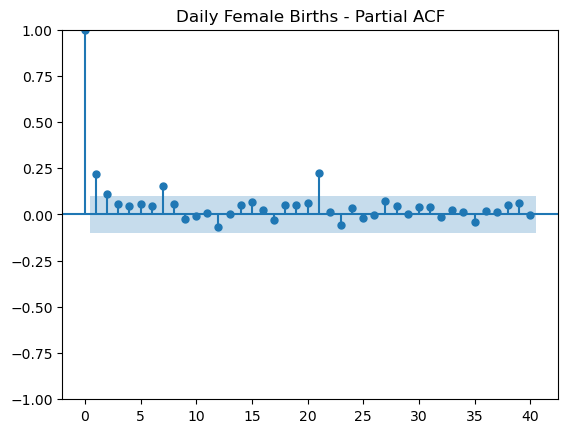

In [33]:
plot_pacf(df2['Births'], lags=40, title='Daily Female Births - Partial ACF')
plt.show()

read these plots in order to determine what orders for the paramiters for the A, R, I, M, A parts of the ARIMA model you should be using
e.g. if there is a sharp cut-off in PACF, you should be adding an AR term to the model - the lag that the PACF cuts off is the indicated number of lag terms